# **Data 602: Homework 2**

# **Technical Notebook - Airplane Crashes**

In [102]:
import pandas as pd 
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts  
import datetime as dt
from collections import Counter
import os


In [103]:
data = pd.read_csv("/content/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [104]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [105]:
data.shape

(5268, 13)

In [106]:
data.isnull().any()

Date            False
Time             True
Location         True
Operator         True
Flight #         True
Route            True
Type             True
Registration     True
cn/In            True
Aboard           True
Fatalities       True
Ground           True
Summary          True
dtype: bool

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


#**Cleaning**

In [62]:
data['Fatalities'].fillna(0, inplace = True)
data['Aboard'].fillna(0, inplace = True)
data['Ground'].fillna(0, inplace = True)

# Lets calculate how many people survived?

In [63]:
data['Survived'] = data['Aboard'] - data['Fatalities']
data['Survived'].fillna(0, inplace = True)

In [64]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


# Total plane crashes per year

### Adding year to make our analysis simpler

In [65]:
data['year'] = pd.DatetimeIndex(data.Date).year

In [66]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived,year
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,1908
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,1912
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,1913
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,1913
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,1913


In [67]:
data_crashes = data['year'].value_counts().to_frame()

In [68]:
data_crashes.reset_index(inplace=True)

In [69]:
data_crashes = data_crashes.rename(columns = {'index':'year', 'year':'crash_counts'})

In [70]:
data_crashes

,year,crash_counts
0,1972,104
1,1968,96
2,1989,95
3,1967,91
4,1973,89
...,...,...
93,1918,4
94,1913,3
95,1915,2
96,1912,1


# **Visual Analysis**

## Line Plot with Crashes per Year 

Text(0, 0.5, 'Number of crashes')

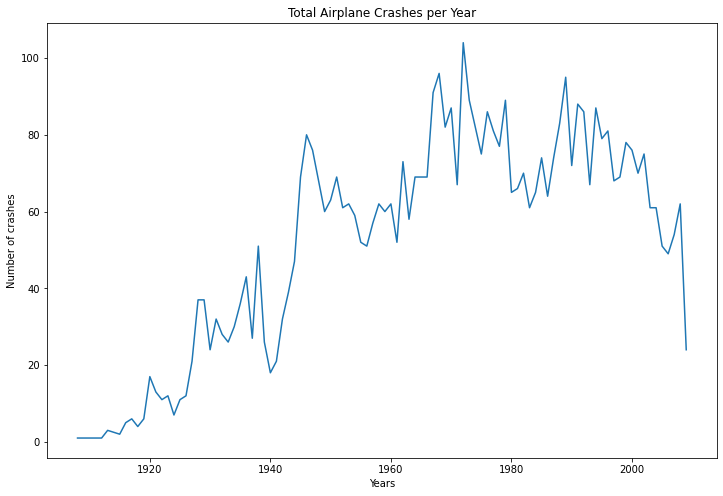

In [71]:
sns.lineplot(x = 'year', y = 'crash_counts', data = data_crashes)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('Years')
plt.ylabel('Number of crashes')

# Death vs people on board

In [72]:
data_deaths = data[['Fatalities', 'year', 'Aboard']].groupby('year').sum()

In [73]:
data_deaths.reset_index(inplace=True)

In [74]:
data_deaths

,year,Fatalities,Aboard
0,1908,1.0,2.0
1,1912,5.0,5.0
2,1913,45.0,51.0
3,1915,40.0,60.0
4,1916,108.0,109.0
...,...,...,...
93,2005,1306.0,2164.0
94,2006,1136.0,1413.0
95,2007,931.0,1364.0
96,2008,820.0,1463.0


Text(0, 0.5, 'Number of deaths and people aboard')

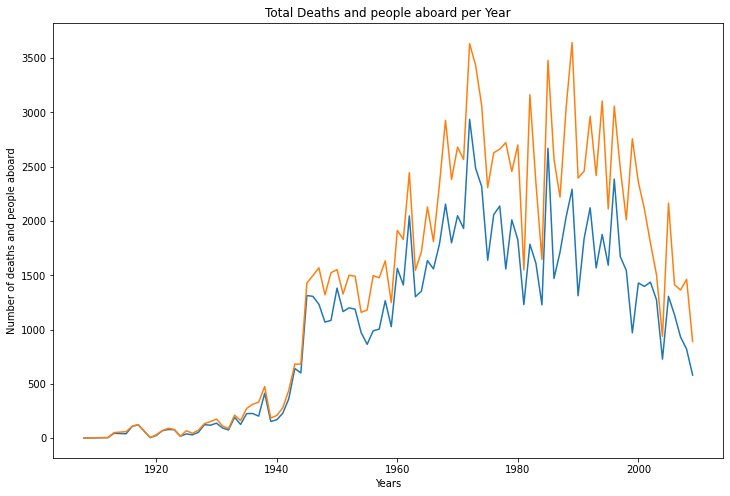

In [75]:
sns.lineplot(x = 'year', y = 'Fatalities', data = data_deaths)
sns.lineplot(x = 'year', y = 'Aboard', data = data_deaths)
plt.title('Total Deaths and people aboard per Year')
plt.xlabel('Years')
plt.ylabel('Number of deaths and people aboard')

## Correlation among variables

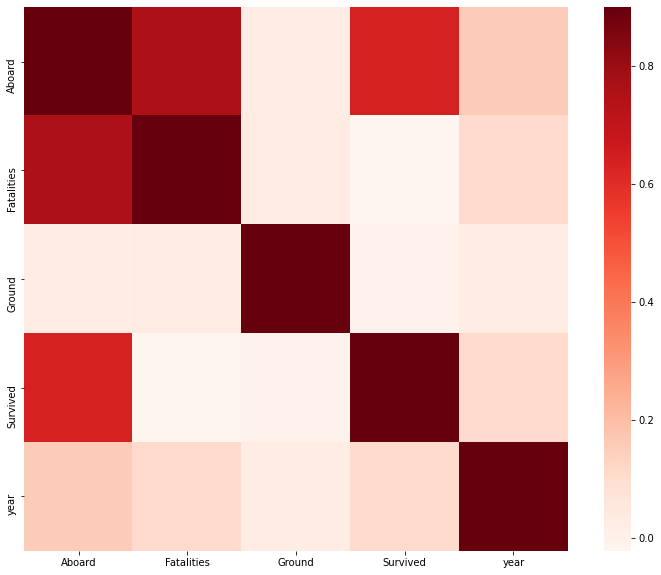

In [76]:
correlation = data.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(correlation, vmax=0.9, cmap="Reds", square=True)

## Fatalities per Accident & Accident with Operator

In [77]:
data.Operator = data.Operator.str.upper() #just to avoid duplicates
operator = data[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

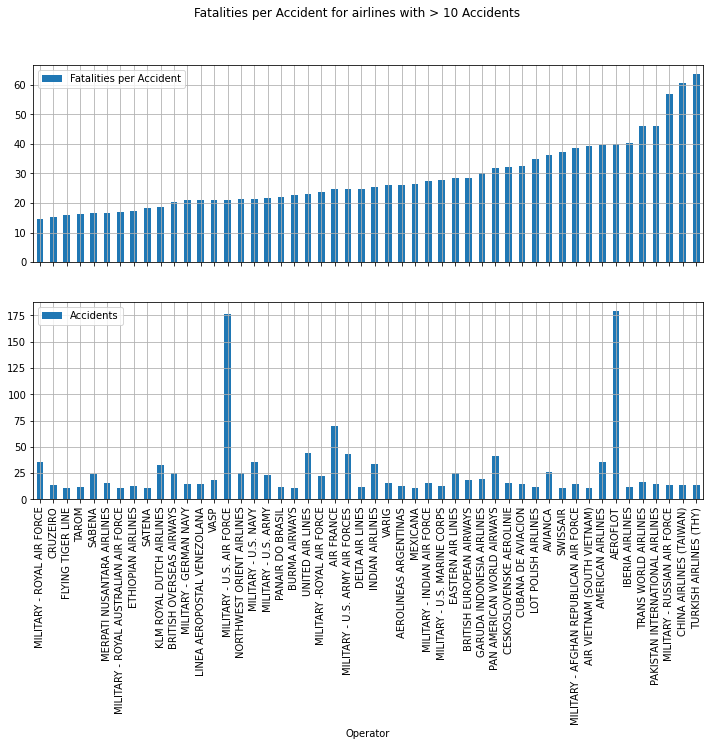

In [78]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
ops = operator['Fatalities'].reset_index()
ops['Fatalities per Accident'] = ops['sum']/ops['count']
ops.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 10
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
opsplot = ops[ops['Accidents']>minacc]
opsplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
opsplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

## Trend with respect to Highest Survival Passenger in Crash by Operator

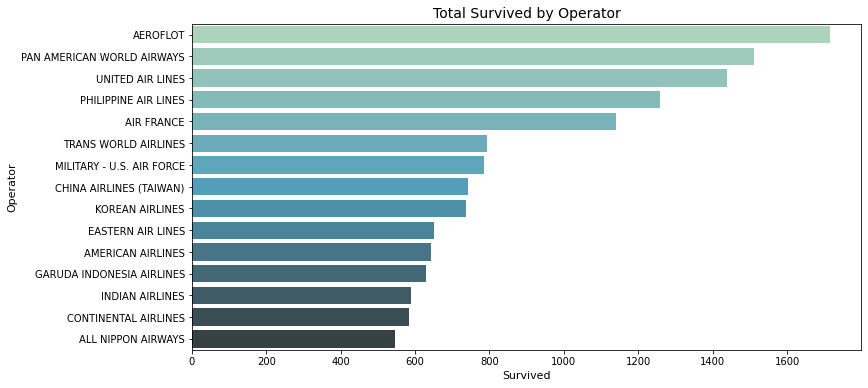

In [99]:
data1 = data.groupby('Operator')[['Survived']].sum()
data1 = data1.rename(columns={"Operator": "Survived"})
data1 = data1.sort_values(by='Survived', ascending=False)
trend = data1.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=trend.index, x="Survived", data=trend, palette="GnBu_d", orient='h')
plt.xlabel('Survived', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Survived by Operator', loc='Center', fontsize=14)
plt.show()

# **Cluster Analysis**

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [80]:
data_text = data['Summary'].dropna()
data_text = pd.DataFrame(data_text)
random_state = 0 

In [81]:
documents = list(data_text['Summary'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Extracting features

In [82]:
features = vectorizer.get_feature_names()

# Applying minibatch kmeans as clustering algorithm and using number of clusters as 5.

In [83]:
model = MiniBatchKMeans(n_clusters=5, random_state=random_state)
model.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [84]:
model.cluster_centers_

array([[0.00026371, 0.00491054, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00014849, 0.00917821, 0.000252  , ..., 0.00022665, 0.0001716 ,
        0.        ],
       [0.        , 0.00854235, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01288102, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00338062, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Predicting words from the text and extracting labels from the text

In [85]:
minibatch_prediction = model.predict(X)

In [87]:
print ('Common terms in each cluster:')

# sorting cluster centers by proximity to centroid
order_centroids = model.cluster_centers_.argsort()[:,::-1] 


for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: 
        print ('%s' % features[j]),
    print

Common terms in each cluster:


Cluster 0:
en
route
crashed
disappeared
mountain
plane
cargo
weather
flight
pilot


Cluster 1:
aircraft
crashed
approach
pilot
flight
weather
runway
mountain
plane
conditions


Cluster 2:
crashed
plane
cargo
taking
attempting
land
mountain
shortly
sea
fog


Cluster 3:
shot
midair
collision
air
missile
rebels
aircraft
killed
surface
aboard


Cluster 4:
takeoff
engine
failure
crashed
shortly
plane
aircraft
lost
failed
runway


In [88]:
# reduce the features to 2D
pca = PCA(n_components = 2, random_state = random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

## This shows 5 different clusters, each has similar words but different from other clusters

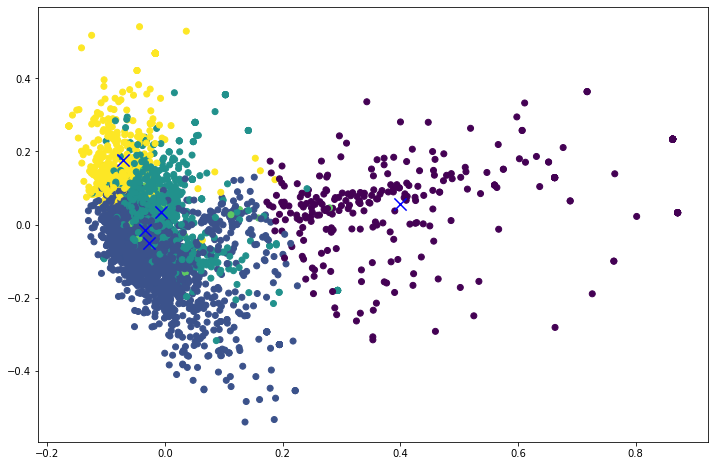

In [89]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c = minibatch_prediction)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## In the plot above we can see there are 2 clusters very close to each other and one overlapping the other, this means that all the clusters have similar words. Therefore, I will try to improve the prediction using kmeans.

# **KMeans** **Clustering**

## Using Elbow method to predict the best clusters to take for our classification, by using this I can make my model better as I would know the right number of clusters to take. 

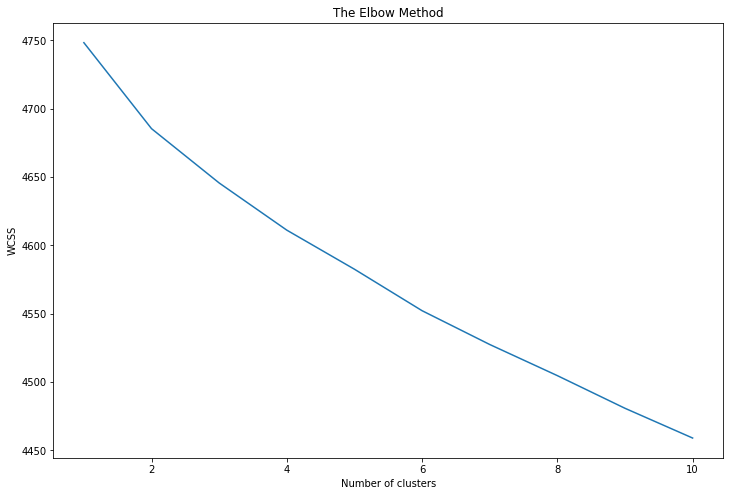

In [91]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

## Elbow method didnt give me any results and there was no dip seen. Therefore, I will try to use 3, 5 cluster to see which gives the best result.

# Case 1: Using 3 clusters

In [92]:
kmeans_3 = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1)
kmeans_3.fit(X)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(features[word] for word in centroid))

0 : shot, rebels, missile, surface, air, aircraft, british, forces, enemy, anti, military, afghan, japanese, rebel, fighters, unita, fighter, plane, german, communist, allied, invasion, normandy, north, french
1 : en, route, crashed, disappeared, mountain, plane, cargo, mountains, mountainous, went, missing, aircraft, wreckage, terrain, struck, poor, undetermined, mt, weather, mail, flight, sea, recovered, cause, reasons
2 : engine, failure, crashed, takeoff, plane, aircraft, lost, emergency, failed, landing, experiencing, right, left, airport, power, return, pilot, loss, cargo, taking, altitude, fuel, runway, flight, shortly
3 : weather, conditions, vfr, adverse, flight, continued, poor, crashed, pilot, mountain, route, low, ifr, flew, en, fog, related, terrain, struck, flying, rain, ceiling, trees, disorientation, plane
4 : attempting, land, crashed, plane, cargo, runway, struck, landing, fog, trees, heavy, burned, poor, short, airport, aircraft, emergency, make, pilot, rain, weather

In [93]:
cluster_centers_for_kmeans_3 = pca.transform(kmeans_3.cluster_centers_)
prediction = kmeans_3.predict(X)

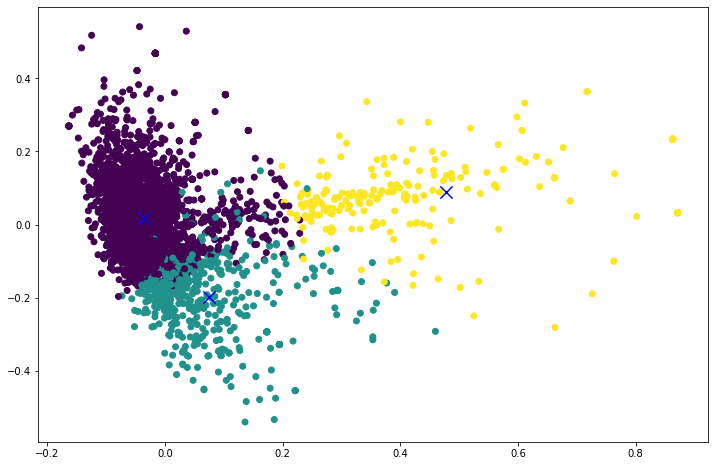

In [94]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=prediction)
plt.scatter(cluster_centers_for_kmeans_3[:, 0], cluster_centers_for_kmeans_3[:,1], marker='x', s=150, c='b')

# Case 2: Using 5 clusters

In [95]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(features[word] for word in centroid))

0 : crashed, aircraft, approach, plane, pilot, runway, mountain, landing, flight, taking, land, crew, struck, attempting, ground, airport, fog, altitude, sea, miles, ft, shortly, control, failure, short
1 : en, route, crashed, disappeared, mountain, plane, cargo, mountains, wreckage, mountainous, aircraft, struck, went, missing, poor, terrain, weather, mt, undetermined, flight, mail, sea, recovered, later, engine
2 : weather, conditions, poor, vfr, adverse, flight, continued, crashed, mountain, pilot, struck, low, terrain, ifr, flew, approach, fog, route, flying, altitude, en, visibility, aircraft, trees, ft
3 : cargo, plane, crashed, attempting, runway, struck, land, mountain, approach, trees, short, altitude, engine, lost, taking, takeoff, poor, landing, ocean, ground, shortly, flew, weather, shifted, stalled
4 : engine, takeoff, failure, crashed, aircraft, plane, shortly, failed, emergency, lost, landing, right, left, power, experiencing, taking, airport, pilot, loss, runway, fuel, 

In [96]:
cluster_centers_for_kmeans = pca.transform(kmeans.cluster_centers_)

In [97]:
prediction=kmeans.predict(X)

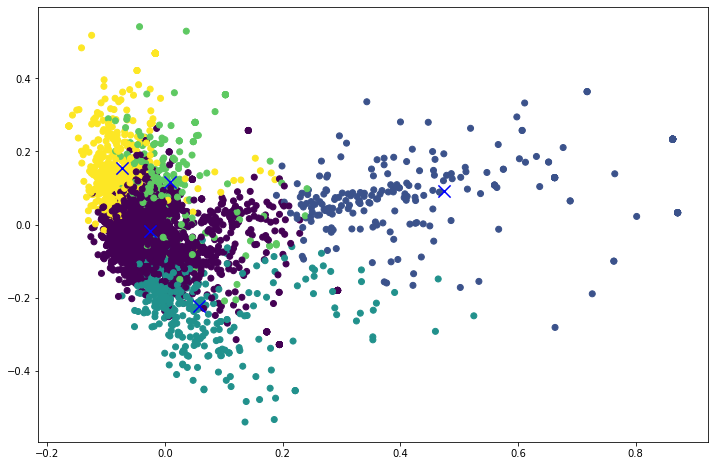

In [98]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=prediction)
plt.scatter(cluster_centers_for_kmeans[:, 0], cluster_centers_for_kmeans[:,1], marker='x', s=150, c='b')

# Here in Kmeans we can see that centroids are more descriptive and far away from each other which shows different classes. Therefore, our  classes have different words and similar within. 

## Kmeans performs good for both 3 and 5 clusters.

# *References*

https://www.kaggle.com/iamrohitsingh/flight-crash-investigation

https://datasciencebowl.com/data-analysis-on-aviation-accidents/

https://www.kaggle.com/thebrownviking20/k-means-clustering-of-1-million-headlines

https://datasciencebowl.com/data-analysis-on-aviation-accidents/

https://data.world/data-society/airplane-crashes

https://www.kaggle.com/elifnkaraca/text-clustering-using-kmeans-for-airplane-crashes